In [4]:
# Model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

# Plot
import matplotlib.pyplot as plt

# Datas
from sklearn.model_selection import train_test_split
from google.colab import drive
import xgboost as xgb
import pandas as pd 
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

# Prepare

In [5]:
# Data
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/learning-data-science-main/machine-learning/datas/Hitters.csv")
df = df.dropna()
df.index = np.arange(df.shape[0])

# Dummie
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

Mounted at /content/gdrive


# Model

In [6]:
lgbm_model = LGBMRegressor().fit(X_train, y_train)

# Predict

In [7]:
y_pred = lgbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

# Model Tuning

In [9]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

### Tuned Model

In [10]:
# Params
params=pd.Series(lgbm_cv_model.best_params_)
lgbm_tuned = LGBMRegressor(colsample_bytree=float(params[0]), 
                         n_estimators=int(params[3]), 
                         max_depth=int(params[2]), 
                         learning_rate=float(params[1]))
lgbm_tuned.fit(X_train, y_train)

# Validated Error
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

378.960437342183

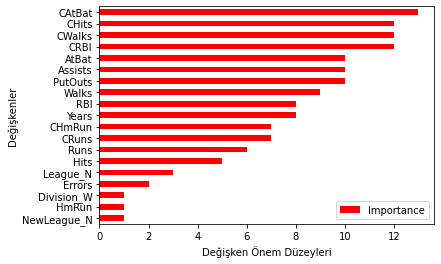

In [14]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri");
plt.ylabel("Değişkenler");